# Fashion Class Classification

#### *From Udemy, Dr. Ryan Ahmed*

## Importing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv")
fashion_test_df = pd.read_csv("fashion-mnist_test.csv")
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print("train dataset shape:", fashion_train_df.shape)
print("test dataset shape:", fashion_test_df.shape)

train dataset shape: (60000, 785)
test dataset shape: (10000, 785)


## Visualization

In [6]:
training = np.array(fashion_train_df, dtype = "float32")
testing = np.array(fashion_test_df, dtype = "float32")
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
import random
i = random.randint(1, 60000)

4.0

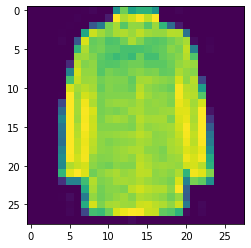

In [15]:
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

In [ ]:
# Labels

# Each training and test example is assigned to one of the following labels:

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot


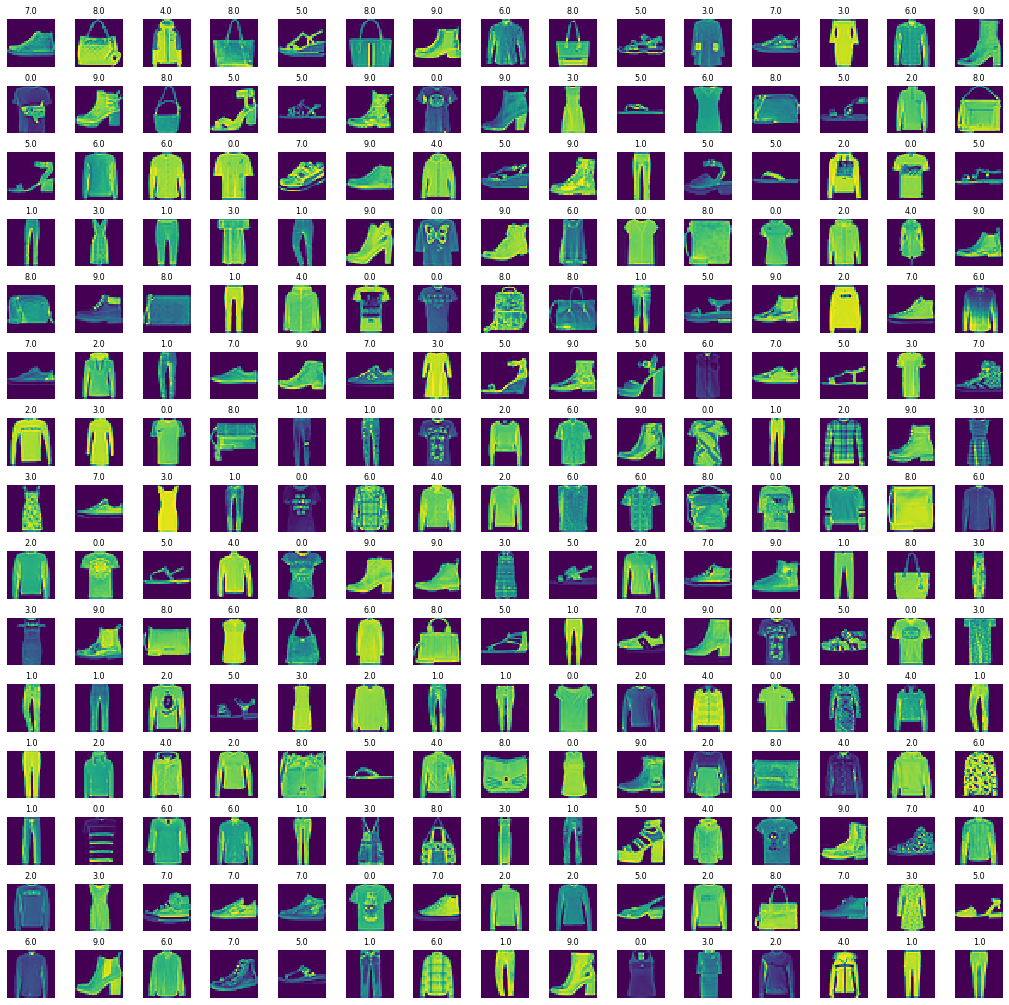

In [20]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (18, 18))
axes = axes.ravel()

n_training = len(training)
for i in np.arange(0, w_grid*l_grid):
    index = random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)

## Model Training

In [25]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2)

In [30]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))
X_train.shape

(48000, 28, 28, 1)

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense #dropout ot generalize to fit more data, reduce overfitting
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

cnn_model = Sequential()
cnn_model.add(Conv2D(32, 3,3, input_shape = (28,28,1), activation = "relu")) #increase kernels, Conv2D(64
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = (32), activation = "relu"))
cnn_model.add(Dense(output_dim = (10), activation = "sigmoid"))
cnn_model.compile(loss = "sparse_categorical_crossentropy", optimizer=Adam(lr = 0.001), metrics = ["accuracy"])
epochs = 50

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  if sys.path[0] == '':


In [43]:
cnn_model.fit(X_train,
             y_train,
             batch_size = 512,
             nb_epoch = epochs, 
             verbose = 1,
             validation_data = (X_validate, y_validate))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 270us/step - loss: 1.0789 - accuracy: 0.5805 - val_loss: 0.5851 - val_accuracy: 0.7915
Epoch 2/50
48000/48000 [==============================] - 13s 269us/step - loss: 0.5377 - accuracy: 0.8070 - val_loss: 0.4844 - val_accuracy: 0.8295
Epoch 3/50
48000/48000 [==============================] - 12s 253us/step - loss: 0.4705 - accuracy: 0.8357 - val_loss: 0.4488 - val_accuracy: 0.8410
Epoch 4/50
48000/48000 [==============================] - 12s 245us/step - loss: 0.4383 - accuracy: 0.8474 - val_loss: 0.4373 - val_accuracy: 0.8429
Epoch 5/50
48000/48000 [==============================] - 12s 248us/step - loss: 0.4162 - accuracy: 0.8563 - val_loss: 0.4162 - val_accuracy: 0.8564
Epoch 6/50
48000/48000 [==============================] - 13s 267us/step - loss: 0.4036 - accuracy: 0.8609 - val_loss: 0.3944 - val_accuracy: 0.8639
Epoch 7/50
48000/48000 [==============================] 

## Evaluation

In [45]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy: {:.3f}".format(evaluation[1]))

10000/10000 [==============================] - 1s 111us/step
Test Accuracy: 0.907


In [47]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 6, ..., 8, 8, 1])

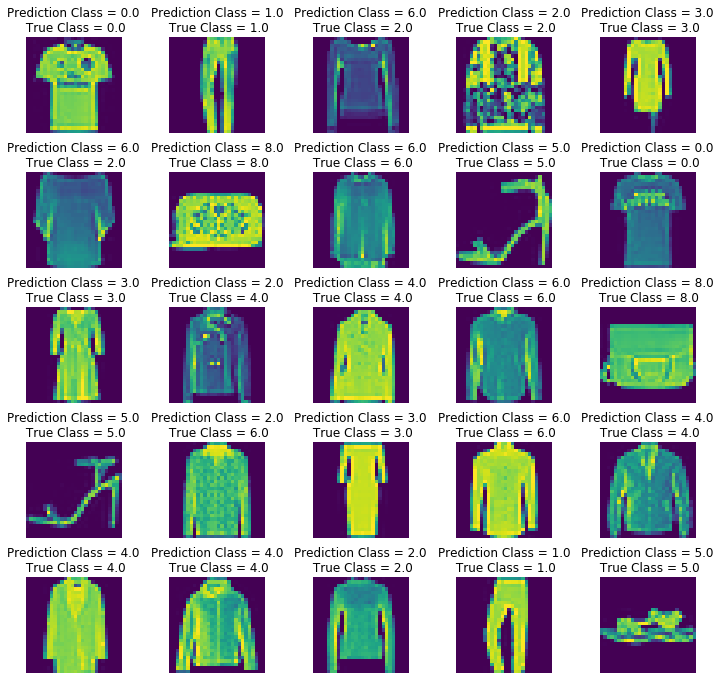

In [49]:
L = 5
W = 5
fig,axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace = 0.5)

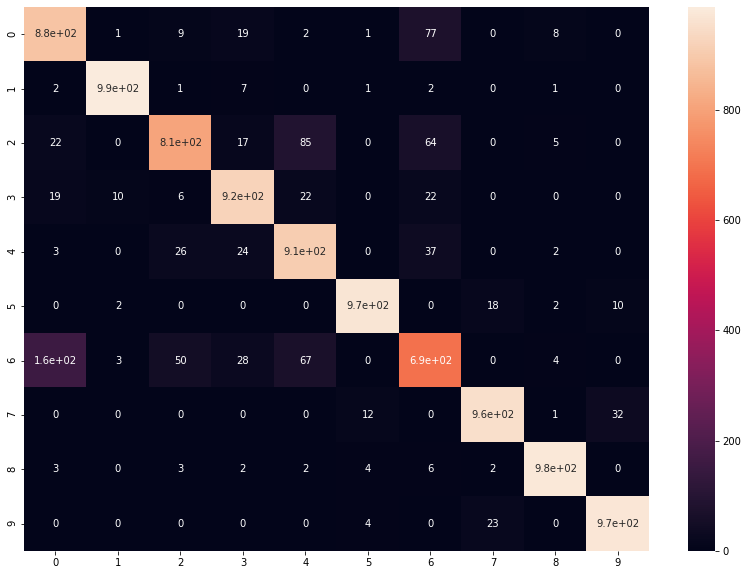

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [57]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print (classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.88      0.85      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.89      0.81      0.85      1000
     Class 3       0.90      0.92      0.91      1000
     Class 4       0.84      0.91      0.87      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.77      0.69      0.73      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

